# TensorFlow - Google

![TensorFlow](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_tensorflow.png "TensorFlow")

TensorFlow is an open source software library for machine learning in various kinds of perceptual and language understanding tasks. It is currently used for both research and production by different teams in many commercial Google products, such as speech recognition, Gmail, Google Photos, and search, many of which had previously used its predecessor DistBelief. TensorFlow was originally developed by the Google Brain team for Google's research and production purposes and later released under the Apache 2.0 open source license on November 9, 2015.

* [TensorFlow Homepage](https://www.tensorflow.org/)
* [TensorFlow GitHib](https://github.com/tensorflow/tensorflow)
* [TensorFlow Google Groups Support](https://groups.google.com/forum/#!forum/tensorflow)
* [TensorFlow Google Groups Developer Discussion](https://groups.google.com/a/tensorflow.org/forum/#!forum/discuss)
* [TensorFlow FAQ](https://www.tensorflow.org/resources/faq)


# What version of TensorFlow do you have?

TensorFlow is very new and changing rapidly.  It is very important that you run the same version of it that I am using.  For this semester we will use a specific version of TensorFlow (mentioned in the last class notes).

![Self Driving Car](http://imgc-cn.artprintimages.com/images/P-473-488-90/94/9475/CFB6500Z/posters/paul-noth-does-your-car-have-any-idea-why-my-car-pulled-it-over-new-yorker-cartoon.jpg)

[Wrong version of TensorFlow?](https://twitter.com/reza_zadeh/status/849160032608440320)

In [1]:
import tensorflow as tf
print("Tensor Flow Version: {}".format(tf.__version__))

/home/arijit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensor Flow Version: 1.7.0


# Installing TensorFlow

* [IBM Data Scientist Workbench](datascientistworkbench.com) - All platforms, use your browser.
* Windows - Supported platform.
* Mac - Supported platform.
* Linux - Supported platform.

[TensorFlow Setup Instructions](https://www.tensorflow.org/versions/r0.10/get_started/os_setup.html#docker-based_installation)

# Why TensorFlow

* Supported by Google
* Works well on Linux/Mac
* Excellent GPU support
* Python is an easy to learn programming language
* Python is [extremely popular](http://www.kdnuggets.com/2014/08/four-main-languages-analytics-data-mining-data-science.html) in the data science community

# Other Deep Learning Tools
TensorFlow is not the only only game in town.  These are some of the best supported alternatives.  Most of these are written in C++. In order of my own preference (ordered in my own estimation of approximate importance):

* [TensorFlow](https://www.tensorflow.org/) Google's deep learning API.  The focus of this class, along with Keras.
* [MXNet](https://mxnet.incubator.apache.org/) Apache foundation's deep learning API. Can be used through Keras.
* [Theano](http://deeplearning.net/software/theano/) - Python, from the academics that created deep learning.
* [Keras](https://keras.io/) - Also by Google, higher level framework that allows the use of TensorFlow, MXNet and Theano interchangeably.
[Torch](http://torch.ch/) is used by Google DeepMind, the Facebook AI Research Group, IBM, Yandex and the Idiap Research Institute.  It has been used for some of the most advanced deep learning projects in the world.  However, it requires the [LUA](https://en.wikipedia.org/wiki/Lua_(programming_language)) programming language.  It is very advanced, but it is not mainstream.  I have not worked with Torch (yet!).
* [PaddlePaddle](https://github.com/baidu/Paddle) - [Baidu](http://www.baidu.com/)'s deep learning API.
* [Deeplearning4J](http://deeplearning4j.org/) - Java based. Supports all major platforms. GPU support in Java!
* [Computational Network Toolkit (CNTK)](https://github.com/Microsoft/CNTK) - Microsoft.  Support for Windows/Linux, command line only.  Bindings for predictions for C#/Python. GPU support.
* [H2O](http://www.h2o.ai/) - Java based.  Supports all major platforms.  Limited support for computer vision. No GPU support.



# Using TensorFlow

TensorFlow is a low-level mathematics API, similar to [Numpy](http://www.numpy.org/).  However, unlike Numpy, TensorFlow is built for deep learning.  TensorFlow works by allowing you to define compute graphs with Python.  In this regard, it is similar to [Spark](http://spark.apache.org/).  TensorFlow compiles these compute graphs into highly efficient C++/[CUDA](https://en.wikipedia.org/wiki/CUDA) code.

The [TensorBoard](https://www.tensorflow.org/versions/r0.10/how_tos/summaries_and_tensorboard/index.html) command line utility can be used to view these graphs.  The iris neural network's graph used in this class is shown here:

![Iris Graph](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_graph_tf.png "Iris Graph")

Expanding the DNN gives:


![Iris DNN Graph](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/class_2_graph_dnn.png "Iris DNN Graph")


# TensorFlow Graphs

So far we've communicated with TensorFlow using TensorFlow Learn, which allows you to specify the number of hidden layers and simply create the neural network.  

/home/arijit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


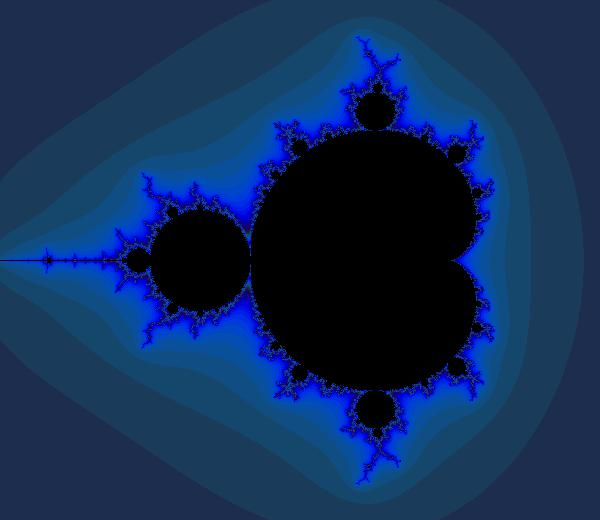

In [1]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

sess = tf.InteractiveSession()

# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

tf.global_variables_initializer().run()

# Compute the new values of z: z^2 + x
zs_ = zs*zs + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )

for i in range(200): step.run()
    
DisplayFractal(ns.eval())

In [2]:
import tensorflow as tf

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

with tf.Session() as sess:
  result = sess.run([product])
  print(result)

[array([[12.]], dtype=float32)]


In [5]:
# Enter an interactive TensorFlow Session.
import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# Initialize 'x' using the run() method of its initializer op.
x.initializer.run()

# Add an op to subtract 'a' from 'x'.  Run it and print the result
sub = tf.subtract(x, a)
print(sub.eval())
# ==> [-2. -1.]

[-2. -1.]


/Users/jheaton/miniconda3/envs/wustl/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [6]:
sess.run(x.assign([4.0, 6.0]))

array([4., 6.], dtype=float32)

In [7]:
print(sub.eval())

[1. 3.]


In [8]:
# Close the Session when we're done.
sess.close()

---
# Using Keras

[Keras](https://keras.io/) is a layer on top of Tensorflow that makes it much easier to create neural networks.  Rather than define the graphs, like you see above, you define the individual layers of the network with a much more high level API.  Unless you are performing research into entirely new structures of deep neural networks it is unlikely that you need to program TensorFlow directly.  

**For this class, we will usually use TensorFlow through Keras, rather than direct TensorFlow**

Keras is a separate install from TensorFlow.  To install Keras, use **pip install keras** after **pip install tensorflow**.

# Helpful Functions for Tensorflow(custom):

The following functions will be used in conjunction with TensorFlow to help preprocess the data.  It is okay to just use them. For better understanding, try to understand how they work.

These functions allow you to build the feature vector for a neural network. Consider the following:

* Predictors/Inputs 
    * Fill any missing inputs with the median for that column.  Use **missing_median**.
    * Encode textual/categorical values with **encode_text_dummy**.
    * Encode numeric values with **encode_numeric_zscore**.
* Output
    * Discard rows with missing outputs.
    * Encode textual/categorical values with **encode_text_index**.
    * Do not encode output numeric values.
* Produce final feature vectors (x) and expected output (y) with **to_xy**.


In [4]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to a single dummy variable.  The new columns (which do not replace the old) will have a 1
# at every location where the original column (name) matches each of the target_values.  One column is added for
# each target value.
def encode_text_single_dummy(df, name, target_values):
    for tv in target_values:
        l = list(df[name].astype(str))
        l = [1 if str(x) == str(tv) else 0 for x in l]
        name2 = "{}-{}".format(name, tv)
        df[name2] = l


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  Is it really this hard? :(
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        # Regression
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low

# Simple TensorFlow Regression: MPG

This example shows how to encode the MPG dataset for regression.  This is slightly more complex than Iris, because:

* Input has both numeric and categorical
* Input has missing values

To encode categorical values that are part of the feature vector, use the functions from above.  If the categorical value is the target (as was the case with Iris, use the same technique as Iris). The iris technique allows you to decode back to Iris text strings from the predictions.

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn import metrics
path = "./data/"

filename_read = os.path.join(path,"auto-mpg.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

In [7]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [8]:
cars = df['name']
df.drop('name',1,inplace=True)
missing_median(df, 'horsepower')
x,y = to_xy(df,"mpg")
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100
 - 0s - loss: 52318.0544
Epoch 2/100
 - 0s - loss: 6016.7998
Epoch 3/100
 - 0s - loss: 1702.7281
Epoch 4/100
 - 0s - loss: 825.1948
Epoch 5/100
 - 0s - loss: 242.5708
Epoch 6/100
 - 0s - loss: 181.6033
Epoch 7/100
 - 0s - loss: 145.3668
Epoch 8/100
 - 0s - loss: 143.2027
Epoch 9/100
 - 0s - loss: 138.3675
Epoch 10/100
 - 0s - loss: 136.9632
Epoch 11/100
 - 0s - loss: 134.7690
Epoch 12/100
 - 0s - loss: 133.9655
Epoch 13/100
 - 0s - loss: 133.3085
Epoch 14/100
 - 0s - loss: 130.9230
Epoch 15/100
 - 0s - loss: 130.4067
Epoch 16/100
 - 0s - loss: 128.9987
Epoch 17/100
 - 0s - loss: 128.3438
Epoch 18/100
 - 0s - loss: 127.5904
Epoch 19/100
 - 0s - loss: 126.3591
Epoch 20/100
 - 0s - loss: 125.7734
Epoch 21/100
 - 0s - loss: 127.0448
Epoch 22/100
 - 0s - loss: 124.1471
Epoch 23/100
 - 0s - loss: 123.1156
Epoch 24/100
 - 0s - loss: 123.0984
Epoch 25/100
 - 0s - loss: 122.1230
Epoch 26/100
 - 0s - loss: 120.4636
Epoch 27/100
 - 0s - loss: 119.5598
Epoch 28/100
 - 0s - loss: 118.90

In [13]:
y.shape

(398, 1)

* ** Dense=** means every layer of previous layer is fully connected to the next layer.
   * "model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1"
      * "input_dim=x.shape[1]" = The input size
      * "25" = That input is connected to 25 Neurons. and likewise in the next step is "10"
   * "model.add(Dense(1)) # Output" = The output is a regrassion neural network.

* **Compile=** We compile it to built the compute graph.
   * "loss='mean_squared_error'" = Is a error calculation usually used for regrassion.
* **Fit=** Train the model
   
#### The loss gets better as it trains.   




## Controling the Amount of Output

One line is produced for each training epoch.  You can eliminate this output by setting the verbose setting of the fit command:

* **verbose=0** - No progress output (use with Juputer if you do not want output)
* **verbose=1** - Display progress bar, does not work well with Jupyter
* **verbose=2** - Summary progress output (use with Jupyter if you want to know the loss at each epoch)

## Regression Prediction

Next we will perform actual predictions.  These predictions are assigned to the **pred** variable. These are all MPG predictions from the neural network.  Notice that this is a 2D array?  You can always see the dimensions of what is returned by printing out **pred.shape**.  Neural networks can return multiple values, so the result is always an array.  Here the neural network only returns 1 value per prediction (there are 398 cars, so 398 predictions).  However, a 2D array is needed because the neural network has the potential of returning more than one value.   

In [8]:
pred = model.predict(x)
print("Shape: {}".format(pred.shape))
print(pred)

Shape: (398, 1)
[[15.890929 ]
 [16.241117 ]
 [16.814543 ]
 [17.945524 ]
 [17.271269 ]
 [14.654464 ]
 [14.797774 ]
 [15.42459  ]
 [15.341689 ]
 [15.937682 ]
 [13.624663 ]
 [16.614668 ]
 [10.756011 ]
 [11.537887 ]
 [25.69724  ]
 [19.317137 ]
 [19.262815 ]
 [17.411703 ]
 [25.729086 ]
 [19.946524 ]
 [25.5062   ]
 [25.589323 ]
 [25.979856 ]
 [26.260153 ]
 [18.24124  ]
 [22.811888 ]
 [25.145658 ]
 [25.316282 ]
 [25.47029  ]
 [25.991224 ]
 [22.129599 ]
 [25.620924 ]
 [25.242956 ]
 [16.750937 ]
 [19.965559 ]
 [16.992964 ]
 [15.718139 ]
 [18.43234  ]
 [17.933867 ]
 [15.370254 ]
 [16.387098 ]
 [18.810438 ]
 [18.733717 ]
 [15.63687  ]
 [17.255415 ]
 [16.398611 ]
 [20.49436  ]
 [16.894789 ]
 [15.325637 ]
 [23.26695  ]
 [24.236715 ]
 [24.910398 ]
 [25.058966 ]
 [24.610205 ]
 [24.539251 ]
 [21.709612 ]
 [23.137175 ]
 [25.91918  ]
 [24.568823 ]
 [22.24816  ]
 [22.518446 ]
 [23.369642 ]
 [18.38066  ]
 [15.3727255]
 [19.147993 ]
 [16.613523 ]
 [19.184065 ]
 [16.93611  ]
 [17.923979 ]
 [18.292479 ]
 [16

#### We would like to see how good these predictions are.  We know what the correct MPG is for each car, so we can measure how close the neural network was.

In [9]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 6.050127983093262


This means that, on average the predictions were within +/- 5.89 values of the correct value.  This is not very good, but we will soon see how to improve it.

We can also print out the first 10 cars, with predictions and actual MPG.

In [10]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Car name: {cars[i]}, MPG: {y[i]}, predicted MPG: {pred[i]}")

1. Car name: chevrolet chevelle malibu, MPG: [18.], predicted MPG: [15.890929]
2. Car name: buick skylark 320, MPG: [15.], predicted MPG: [16.241117]
3. Car name: plymouth satellite, MPG: [18.], predicted MPG: [16.814543]
4. Car name: amc rebel sst, MPG: [16.], predicted MPG: [17.945524]
5. Car name: ford torino, MPG: [17.], predicted MPG: [17.271269]
6. Car name: ford galaxie 500, MPG: [15.], predicted MPG: [14.654464]
7. Car name: chevrolet impala, MPG: [14.], predicted MPG: [14.797774]
8. Car name: plymouth fury iii, MPG: [14.], predicted MPG: [15.42459]
9. Car name: pontiac catalina, MPG: [14.], predicted MPG: [15.341689]
10. Car name: amc ambassador dpl, MPG: [15.], predicted MPG: [15.937682]


# Simple TensorFlow Classification: Iris

This is a very simple example of how to perform the Iris classification using TensorFlow.  The iris.csv file is used, rather than using the built-in files that many of the Google examples require.  

**Make sure that you always run previous code blocks.  If you run the code block below, without the codeblock above, you will get errors**

In [14]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping

url="https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/data/iris.csv"
df=pd.read_csv(io.StringIO(requests.get(url).content.decode('utf-8')),na_values=['NA','?'])

species = encode_text_index(df,"species")
x,y = to_xy(df,"species")

# Split into train/test
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

/Users/jheaton/miniconda3/envs/wustl/lib/python3.6/site-packages/ipykernel_launcher.py:71: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Epoch 1/100
 - 0s - loss: 1.5321
Epoch 2/100
 - 0s - loss: 1.1823
Epoch 3/100
 - 0s - loss: 0.9633
Epoch 4/100
 - 0s - loss: 0.8568
Epoch 5/100
 - 0s - loss: 0.8112
Epoch 6/100
 - 0s - loss: 0.7729
Epoch 7/100
 - 0s - loss: 0.7342
Epoch 8/100
 - 0s - loss: 0.6918
Epoch 9/100
 - 0s - loss: 0.6594
Epoch 10/100
 - 0s - loss: 0.6304
Epoch 11/100
 - 0s - loss: 0.6078
Epoch 12/100
 - 0s - loss: 0.5864
Epoch 13/100
 - 0s - loss: 0.5648
Epoch 14/100
 - 0s - loss: 0.5447
Epoch 15/100
 - 0s - loss: 0.5274
Epoch 16/100
 - 0s - loss: 0.5123
Epoch 17/100
 - 0s - loss: 0.4985
Epoch 18/100
 - 0s - loss: 0.4856
Epoch 19/100
 - 0s - loss: 0.4757
Epoch 20/100
 - 0s - loss: 0.4636
Epoch 21/100
 - 0s - loss: 0.4544
Epoch 22/100
 - 0s - loss: 0.4442
Epoch 23/100
 - 0s - loss: 0.4349
Epoch 24/100
 - 0s - loss: 0.4259
Epoch 25/100
 - 0s - loss: 0.4165
Epoch 26/100
 - 0s - loss: 0.4081
Epoch 27/100
 - 0s - loss: 0.3999
Epoch 28/100
 - 0s - loss: 0.3915
Epoch 29/100
 - 0s - loss: 0.3838
Epoch 30/100
 - 0s - lo

In [15]:
# Print out number of species found:

print(species)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Now that you have a neural network trained, we would like to be able to use it. The following code makes use of our neural network. Exactly like before, we will generate preditions.  Notice that 3 values come back for each of the 150 iris flowers.  There were 3 types of iris (Iris-setosa, Iris-versicolor, and Iris-virginica).  

In [16]:
pred = model.predict(x)
print("Shape: {pred.shape}")
print(pred)

Shape: {pred.shape}
[[9.98141766e-01 1.85813743e-03 7.84108423e-08]
 [9.94287789e-01 5.71170775e-03 5.25794292e-07]
 [9.96763468e-01 3.23626073e-03 2.87835377e-07]
 [9.94211853e-01 5.78736281e-03 7.48221396e-07]
 [9.98441875e-01 1.55802397e-03 6.76172718e-08]
 [9.98073459e-01 1.92637125e-03 5.99593690e-08]
 [9.96840119e-01 3.15950601e-03 3.21779737e-07]
 [9.97221708e-01 2.77819787e-03 1.58455904e-07]
 [9.92207587e-01 7.79083837e-03 1.48115771e-06]
 [9.95586753e-01 4.41287411e-03 3.45778290e-07]
 [9.98655438e-01 1.34450989e-03 3.38689112e-08]
 [9.96561825e-01 3.43788555e-03 2.73452684e-07]
 [9.95245636e-01 4.75392072e-03 4.42271414e-07]
 [9.96766090e-01 3.23348353e-03 4.47371121e-07]
 [9.99580801e-01 4.19193500e-04 3.82636278e-09]
 [9.99558747e-01 4.41181182e-04 4.87011187e-09]
 [9.99045432e-01 9.54532938e-04 2.22020624e-08]
 [9.97707248e-01 2.29263958e-03 1.10291964e-07]
 [9.98234630e-01 1.76534581e-03 3.58703360e-08]
 [9.98563111e-01 1.43689441e-03 5.52007329e-08]
 [9.96399641e-01 3.6

In [17]:
# If you would like to turn of scientific notation, the following line can be used:
np.set_printoptions(suppress=True)

In [18]:
# The to_xy function represented the input in the same way.  Each row has only 1.0 value because each row is only one type
# of iris.  This is the training data, we KNOW what type of iris it is.  This is called one-hot encoding.  Only one value
# is 1.0 (hot)
print(y[0:10])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [19]:
# Usually the column (pred) with the highest prediction is considered to be the prediction of the neural network.  It is easy
# to convert the predictions to the expected iris species.  The argmax function finds the index of the maximum prediction
# for each row.
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {expected_classes}")

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Expected: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
# Of course it is very easy to turn these indexes back into iris species.  We just use the species list that we created earlier.
print(species[predict_classes[1:10]])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [21]:
from sklearn.metrics import accuracy_score
# Accuracy might be a more easily understood error metric.  It is essentially a test score.  For all of the iris predictions,
# what percent were correct?  The downside is it does not consider how confident the neural network was in each prediction.
correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.9733333333333334


The code below performs two ad hoc predictions.  The first prediction is simply a single iris flower.  The second predits two iris flowers.  Notice that the argmax in the second prediction requires **axis=1**?  Since we have a 2D arraw now, we must specify which axis to take the argmax over.  The value **axis=1** specifies we want the max column index for each row.

In [22]:
# ad hoc prediction
sample_flower = np.array( [[5.0,3.0,4.0,2.0]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred)
print(f"Predict that {sample_flower} is: {species[pred]}")

# predict two sample flowers
sample_flower = np.array( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred,axis=1)
print(f"Predict that {sample_flower} is: {species[pred]}")

[[0.00174971 0.40726563 0.5909847 ]]
Predict that [[5. 3. 4. 2.]] is: Iris-virginica
[[0.00174971 0.40726563 0.5909847 ]
 [0.99096984 0.00902942 0.00000081]]
Predict that [[5.  3.  4.  2. ]
 [5.2 3.5 1.5 0.8]] is: ['Iris-virginica' 'Iris-setosa']


# Load/Save Trained Network

Complex neural networks will take a long time to fit/train.  It is helpful to be able to save these neural networks so that they can be reloaded later.  A reloaded neural network will not require retraining.  Keras provides three formats for neural network saving.

* **YAML** - Stores the neural network structure (no weights) in the [YAML file format](https://en.wikipedia.org/wiki/YAML).
* **JSON** - Stores the neural network structure (no weights) in the [JSON file format](https://en.wikipedia.org/wiki/JSON).
* **HDF5** - Stores the complete neural network (with weights) in the [HDF5 file format](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). Do not confuse HDF5 with [HDFS](https://en.wikipedia.org/wiki/Apache_Hadoop).  They are different.  We do not use HDFS in this class.

Usually you will want to save in HDF5.

In [36]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
path = "./data/"
save_path = "./dnn/"

filename_read = os.path.join(path,"auto-mpg.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

cars = df['name']
df.drop('name',1,inplace=True)
missing_median(df, 'horsepower')
x,y = to_xy(df,"mpg")
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=0,epochs=100)

# Predict
pred = model.predict(x)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Before save score (RMSE): {score}")

# save neural network structure to JSON (no weights)
model_json = model.to_json()
with open(os.path.join(save_path,"network.json"), "w") as json_file:
    json_file.write(model_json)

# save neural network structure to YAML (no weights)
model_yaml = model.to_yaml()
with open(os.path.join(save_path,"network.yaml"), "w") as yaml_file:
    yaml_file.write(model_yaml)

# save entire network to HDF5 (save everything, suggested)
model.save(os.path.join(save_path,"network.h5"))

Before save score (RMSE): 4.651947021484375


The code below sets up a neural network and reads the data (for predictions), but it does not clear the model directory or fit the neural network.  The weights from the previous fit are used.

Now we reload the network and perform another prediction.  The RMSE should match the previous one exactly if the neural network was really saved and reloaded.

In [37]:
from keras.models import load_model
model2 = load_model(os.path.join(save_path,"network.h5"))
pred = model2.predict(x)
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"After load score (RMSE): {score}")

After load score (RMSE): 4.651947021484375
